In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import floor
from matplotlib import pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium
from pykml import parser
from os import path
from fastkml.kml import KML
from math import sin, cos, sqrt, atan2, radians, asin
from itertools import combinations
import networkx as nx

In [2]:

#fname = '/home/bsilva/Desktop/Kml_Ruta_AMVA/1001.kml'
fname = 'medellin_bike_stations.kml'
kml = KML()
kml.from_string(open(fname, encoding="utf-8").read().encode('utf-8'))
#locations = read_kml(fname)

def getCoordsFromkml(kml):
    coords_by_station = {}
    document = list(kml.features())
    for doc in document:
        folders = list(doc.features())
        for f in folders:
            placemarks = list(f.features())
            for placemark in placemarks:
                print(placemark.name)
                print(str(placemark.geometry.x) + ", "+str(placemark.geometry.y))
                coords_by_station[placemark.name] = [placemark.geometry.y, placemark.geometry.x] #lat, long
    return coords_by_station;
                
coords_by_station = getCoordsFromkml(kml)


La 33
-75.583083, 6.239278
Maria Luisa Calle
-75.593091, 6.215556
Parque de Los Mangos
-75.584, 6.245384
Primer Parque de Laureles
-75.59376, 6.245952
Rosales
-75.591527, 6.231325
Área Metropolitana
-75.573832, 6.242538
Parque de Las Luces I
-75.571845, 6.245865
Parque de Las Luces II
-75.571845, 6.245865
Pies Descalzos I
-75.576988, 6.24541
Pies Descalzos II
-75.576988, 6.24541
Plaza de La Libertad
-75.574664, 6.243464
Plaza Mayor
-75.575608, 6.242681
Circular Primera
-75.591948, 6.241861
Industriales Metroplús
-75.577084, 6.231386
Museo de Antioquia
-75.568784, 6.251823
Pedro Nel Gómez
-75.596608, 6.246907
San Joaquín
-75.586079, 6.243338
Santa Teresita
-75.596704, 6.242072
Orquídeas
-75.588819, 6.26265
Unidad Deportiva de Belén
-75.587554, 6.232522
Batallón
-75.595035, 6.262184
Florida Nueva
-75.59032, 6.252601
La 65
-75.583349, 6.249028
María Mulata
-75.594746, 6.250558
Juan Pablo II
-75.592129, 6.221287
Industriales Metro
-75.574397, 6.230376
MAMM
-75.574981, 6.223781
Nutibara
-75

In [3]:
df_stations_coordinates = pd.DataFrame(list(coords_by_station.items()), columns=['StationName', 'Coordinates'])
#df['Date'] = pd.to_datetime(df['Date'])
df_stations_coordinates.head(10)

,StationName,Coordinates
0,La 33,"[6.239278, -75.583083]"
1,Maria Luisa Calle,"[6.215556, -75.593091]"
2,Parque de Los Mangos,"[6.245384, -75.584]"
3,Primer Parque de Laureles,"[6.245952, -75.59376]"
4,Rosales,"[6.231325, -75.591527]"
5,Área Metropolitana,"[6.242538, -75.573832]"
6,Parque de Las Luces I,"[6.245865, -75.571845]"
7,Parque de Las Luces II,"[6.245865, -75.571845]"
8,Pies Descalzos I,"[6.24541, -75.576988]"
9,Pies Descalzos II,"[6.24541, -75.576988]"


In [4]:
bike_stations_df = pd.read_csv('station_location_with_id.csv', sep=';')
bike_stations_df.head()

,ID,Description,numSlots,shortName,Lat,Lon,isManual,webDescription,photo
0,1,Moravia,15,MRV,"6,276585","-75,564804",1,Frente a la entrada principal del Centro de De...,https://encicla.metropol.gov.co/imgstations/mo...
1,2,Universidad,33,UNI,"6,269267","-75,5653",1,Bajo el viaducto de la estación Universidad de...,https://encicla.metropol.gov.co/imgstations/un...
2,3,Ruta N,40,RTN,"6,265182","-75,566348",0,Frente a la fachada principal de Ruta N sobre ...,https://encicla.metropol.gov.co/imgstations/ru...
3,4,Punto Cero,10,PT0,"6,265161","-75,575066",1,Intercambio vial de Punto Cero al lado de la e...,https://encicla.metropol.gov.co/imgstations/pu...
4,5,Universidad Nacional,33,NaN,"6,259663","-75,578812",1,Portería de la Iguaná con Carrera 65 de la Uni...,https://encicla.metropol.gov.co/imgstations/un...


In [5]:
def convert_coord_to_number(coord_str):
    return float(coord_str.replace(',', '.'))
bike_stations_df['Lat'] = bike_stations_df['Lat'].apply(lambda x : convert_coord_to_number(x))
bike_stations_df['Lon'] = bike_stations_df['Lon'].apply(lambda x : convert_coord_to_number(x))

bike_stations_df

,ID,Description,numSlots,shortName,Lat,Lon,isManual,webDescription,photo
0,1,Moravia,15,MRV,6.276585,-75.564804,1,Frente a la entrada principal del Centro de De...,https://encicla.metropol.gov.co/imgstations/mo...
1,2,Universidad,33,UNI,6.269267,-75.565300,1,Bajo el viaducto de la estación Universidad de...,https://encicla.metropol.gov.co/imgstations/un...
2,3,Ruta N,40,RTN,6.265182,-75.566348,0,Frente a la fachada principal de Ruta N sobre ...,https://encicla.metropol.gov.co/imgstations/ru...
3,4,Punto Cero,10,PT0,6.265161,-75.575066,1,Intercambio vial de Punto Cero al lado de la e...,https://encicla.metropol.gov.co/imgstations/pu...
4,5,Universidad Nacional,33,NaN,6.259663,-75.578812,1,Portería de la Iguaná con Carrera 65 de la Uni...,https://encicla.metropol.gov.co/imgstations/un...
...,...,...,...,...,...,...,...,...,...
102,138,Los Naranjos,36,PITA,6.171916,-75.606987,0,NaN,NaN
103,139,Villa Paula,40,PITA,6.174198,-75.606902,0,NaN,NaN
104,140,Parque el Artista,40,PITA,6.178924,-75.602170,0,NaN,NaN
105,141,Puente pan de Queso I,52,PITA,6.175649,-75.596444,0,NaN,NaN


In [6]:
# Helper function to draw street blocks on map
def add_marker(map, station_name, lat, long):
    folium.Marker(location=[float(lat), float(long)], popup=station_name).add_to(map)   

#initiate map in vancouver
m=folium.Map(location=[6.2427031074310175, -75.49371702640158], zoom_start=12)

#draw the street blocks on the map with a color and assign them to a group
bike_stations_df.apply(lambda l: add_marker(m, l['Description'],l['Lat'], l['Lon']),axis=1)

m

In [7]:
stations_names = bike_stations_df.Description.unique()
distance_df = pd.concat([bike_stations_df, pd.DataFrame(columns = stations_names)]).drop(['ID','numSlots','shortName','Lat','Lon','isManual','webDescription','photo'], 1)
distance_df

,Description,Moravia,Universidad,Ruta N,Punto Cero,Universidad Nacional,Colombia,Suramericana,Estadio,San Juan,...,Bahía Ciclovia,Ideas,Parque Itaguí,Metróplus Cami,Doña María,Los Naranjos,Villa Paula,Parque el Artista,Puente pan de Queso I,Puente pan de Queso II
0,Moravia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Universidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ruta N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Punto Cero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Universidad Nacional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Los Naranjos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Villa Paula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Parque el Artista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Puente pan de Queso I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
def get_coord_by_station_name(station_name):
    lat = bike_stations_df.loc[bike_stations_df['Description'] == station_name, "Lat"].iloc[0]
    lon = bike_stations_df.loc[bike_stations_df['Description'] == station_name, "Lon"].iloc[0]
    return [lat,lon]

def get_station_capacity_by_name(station_name):
    return bike_stations_df.loc[bike_stations_df['Description'] == station_name, "numSlots"].iloc[0]

In [9]:
#calculate distance between 2 geographic points having into account a round globe

#code taken from: https://stackoverflow.com/a/4913653
def haversine(p1, p2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [p1[1], p1[0], p2[1], p2[0]]) #long, lat CONFIRM ORDER!!!!
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [11]:
distance_df.head()

,Description,Moravia,Universidad,Ruta N,Punto Cero,Universidad Nacional,Colombia,Suramericana,Estadio,San Juan,...,Bahía Ciclovia,Ideas,Parque Itaguí,Metróplus Cami,Doña María,Los Naranjos,Villa Paula,Parque el Artista,Puente pan de Queso I,Puente pan de Queso II
0,Moravia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Universidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ruta N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Punto Cero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Universidad Nacional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
station_list = list(bike_stations_df.Description.unique())[0:4]
station_dist = {}


for comb in combinations(station_list, 2):
    p1_coordinates = get_coord_by_station_name(comb[0])
    p2_coordinates = get_coord_by_station_name(comb[1])
    station_dist[comb] = haversine(p1_coordinates, p2_coordinates)

station_dist

{('Moravia', 'Universidad'): 0.8155691394552493,
 ('Moravia', 'Ruta N'): 1.2793888511981488,
 ('Moravia', 'Punto Cero'): 1.7029893619600345,
 ('Universidad', 'Ruta N'): 0.4687685914068091,
 ('Universidad', 'Punto Cero'): 1.1720251225360543,
 ('Ruta N', 'Punto Cero'): 0.963610450928164}

In [205]:
distance_treshold = 1.5

G = nx.Graph()
for station in station_list:
    G.add_node(station, occupancy=30, capacity=get_station_capacity_by_name(station))#add predicted occupancy
    
for stations, distance_km in station_dist.items():
    if distance_km <= distance_treshold:
        G.add_edge(stations[0], stations[1], distance=distance_km)
    
#list(G.edges)
#G.get_edge_data('Moravia','Ruta N') #get edge distance
#nx.set_node_attributes(G, {'Moravia':{'occupancy':-1}}) ###Update node attribute
#G.nodes['Moravia']

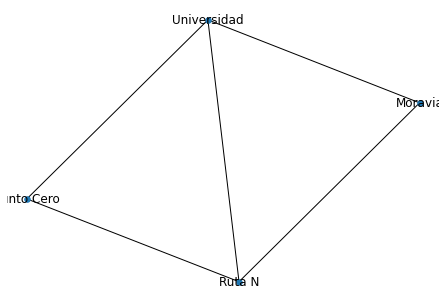

In [206]:
#Note, will probably throw an error. To fix it, downgrade "decorator" version by doing: pip install decorator==4.3

#nx.draw(G, with_labels=True)

nx.draw(G, node_size=30, with_labels=True)

Get neighbours of station Moravia

In [207]:
nodes=[n for n in G.neighbors('Moravia')]
nodes

['Universidad', 'Ruta N']

In [208]:
G.nodes['Moravia']['capacity']

15

Get neighbours of station Moravia sorted by their distance

In [209]:
nearby_stations = sorted(G['Moravia'].items(), key=lambda edge: edge[1]['distance'])
print("station "+nearby_stations[0][0]+" capacity: "+\
str(G.nodes[nearby_stations[0][0]]['occupancy'])+"/"+str(G.nodes[nearby_stations[0][0]]['capacity']))

station Universidad capacity: 30/33


In [210]:
list(nx.bfs_edges(G, 'Moravia'))

[('Moravia', 'Universidad'),
 ('Moravia', 'Ruta N'),
 ('Universidad', 'Punto Cero')]

In [211]:
list(nx.descendants_at_distance(G, 'Moravia', 2))

['Punto Cero']

In [212]:
for k,v in G.nodes(data=True):
    print(k+", capacity="+str(v['capacity'])+", occupancy="+str(v['occupancy']))

Moravia, capacity=15, occupancy=30
Universidad, capacity=33, occupancy=30
Ruta N, capacity=40, occupancy=30
Punto Cero, capacity=10, occupancy=30


In [213]:
#code adapted from: https://www.educative.io/edpresso/how-to-implement-a-breadth-first-search-in-python?fbclid=IwAR1ilvYjxbiM87oikNNzymT-9jrOLsDGlISOuFv2DgFH9wjLsLv4vqtiqBo
visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

def bfs_load_balancing(visited, graph, station):
    #if G.nodes[station]['capacity'] > G.nodes[station]['occupancy']: #> OR >=?
    #    print("Station has enough bicycles to fulfill demand. No load balancing needed.")
    #    return

    bycicles_needed = G.nodes[station]['occupancy'] - G.nodes[station]['capacity']
    visited.append(station)
    queue.append(station)

    while queue:
        s = queue.pop(0) 
        #print (s, end = ", ")
        #check if this node has enough capacity
        if s != station and G.nodes[s]['capacity'] > G.nodes[s]['occupancy']:
            #take all or some bicycles from this station such that it does not surpass
            available_bics = G.nodes[s]['capacity'] - G.nodes[s]['occupancy']
            print(available_bics)
            if bycicles_needed > available_bics:
                bics_taken = available_bics
                #update node info on the original station and station from which we took bics from   
                nx.set_node_attributes(G, {s:{'capacity':G.nodes[s]['capacity']-bics_taken}})
                nx.set_node_attributes(G, {station:{'capacity':G.nodes[station]['capacity']+bics_taken}})
                #update bics needed
                bycicles_needed = bycicles_needed - bics_taken
                print("Taken "+str(bics_taken)+" bicycles from "+s+". Need more "+str(bycicles_needed)+" for "+station)
                #visit other nodes
            else:
                #We can take all needed bics from this station
                #update node info on the original station and station from which we took bics from   
                nx.set_node_attributes(G, {s:{'capacity':G.nodes[s]['capacity']-bycicles_needed}})
                nx.set_node_attributes(G, {station:{'capacity':G.nodes[station]['capacity']+bycicles_needed}})
                print("Taken "+str(bycicles_needed)+" bicycles from "+s+". All necessary bics given to "+station+". \n Complete.")
                #end here
                return
                
        #get neighbour nodes
        neighbour_nodes = [n for n in G.neighbors(s)]
        
        for neighbour in neighbour_nodes:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
            
bfs_load_balancing(visited,queue,'Moravia')

3
Taken 3 bicycles from Universidad. Need more 12 for Moravia
10
Taken 10 bicycles from Ruta N. Need more 2 for Moravia


In [214]:
for k,v in G.nodes(data=True):
    print(k+", capacity="+str(v['capacity'])+", occupancy="+str(v['occupancy']))

Moravia, capacity=28, occupancy=30
Universidad, capacity=30, occupancy=30
Ruta N, capacity=30, occupancy=30
Punto Cero, capacity=10, occupancy=30
